In [16]:
import xmltodict
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

def plotgenericcuts(cuts):
    fig = plt.figure(figsize=(20,5))
    fig.tight_layout()

    varnames=list(cuts.keys())
    
    for b in range(len(varnames)):
        ax=fig.add_subplot(2,5,1+b)
        plt.subplots_adjust(hspace=0.6,wspace=0.5)
        targeteffics=list(cuts[varnames[b]].keys())
        mincuts=[row[0] for row in cuts[varnames[b]].values()]
        maxcuts=[row[1] for row in cuts[varnames[b]].values()]

        # find the maximum "real" cut that's not 1e30
        plotrangemax=0
        plotrangemin=0
        for sample in [mincuts,maxcuts]:
            for x in sample:
                if abs(x)<1e20:
                    if x>plotrangemax:
                        plotrangemax=x
                    elif x<plotrangemin:
                        plotrangemin=x

        plotrange=plotrangemax-plotrangemin
        plotrangemin -= 0.2*plotrange
        plotrangemax += 0.2*plotrange
        
        ax.plot(targeteffics,mincuts)
        ax.plot(targeteffics,maxcuts)
        ax.set_xlabel(f"Target Efficiency")
        ax.set_ylabel("Cut value")
        ax.set_title(f"{varnames[b]}")
        ax.set_ylim([plotrangemin,plotrangemax])
    plt.show()

def readcuts(cutsxml):
    with open(cutsxml) as f:
        lines=f.read().replace('@','')
        d=xmltodict.parse(lines,attr_prefix='')
        efficbins=d["MethodSetup"]["Weights"]["Bin"]
        nvars=int(d["MethodSetup"]["Variables"]["NVar"])
        varnames=[d["MethodSetup"]["Variables"]["Variable"][i]["Title"] for i in range(nvars)]
        cuts = {}
        for v in range(nvars):
            cuts[varnames[v]] = {}
        for effictarget in range(10,100,5):
            for i in range(nvars):
                cuts[varnames[i]][effictarget] = [float(efficbins[effictarget-1]['Cuts'][f"cutMin_{i}"]),
                                                  float(efficbins[effictarget-1]['Cuts'][f"cutMax_{i}"])]
    return cuts

In [17]:
def readeffics(cutsxml):
    effS=[]
    effB=[]
    
    with open(cutsxml) as f:
        lines=f.read().replace('@','')
        d=xmltodict.parse(lines,attr_prefix='')
        efficbins=d["MethodSetup"]["Weights"]["Bin"]
        for i in range(len(efficbins)):
            effS.append(float(efficbins[i]["effS"]))
            effB.append(float(efficbins[i]["effB"]))

    effS.append(1)
    effB.append(1)
    # weird calculation to avoid errors
    roc_auc = 1.-metrics.auc(effS, effB)
    plt.figure(1)
    lw = 2
    plt.plot(effB, effS, color="darkorange", label="AUC = {:.3f}".format(roc_auc))
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    #plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

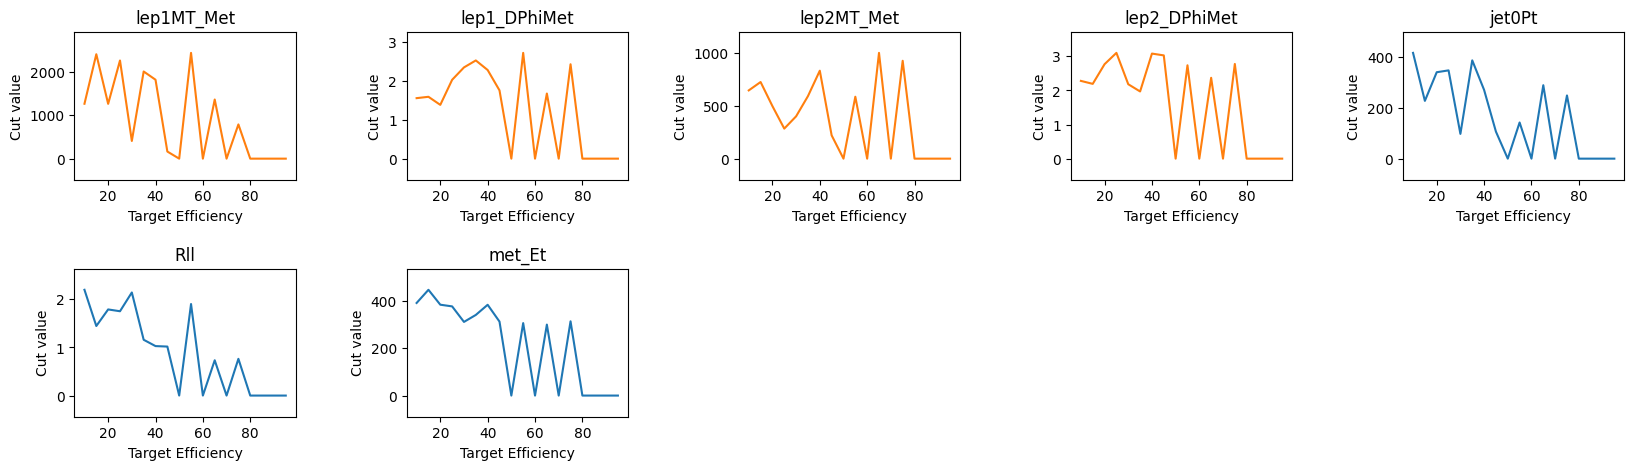

In [64]:
plotgenericcuts(readcuts("MCtrain/SUSY/weights/TMVACuts_Cuts.weights.xml"))

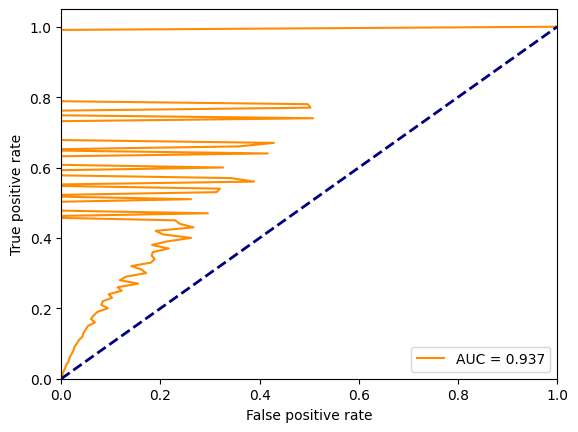

In [91]:
readeffics("MCtrain/SUSY/weights/TMVACuts_Cuts.weights.xml")

random: MC


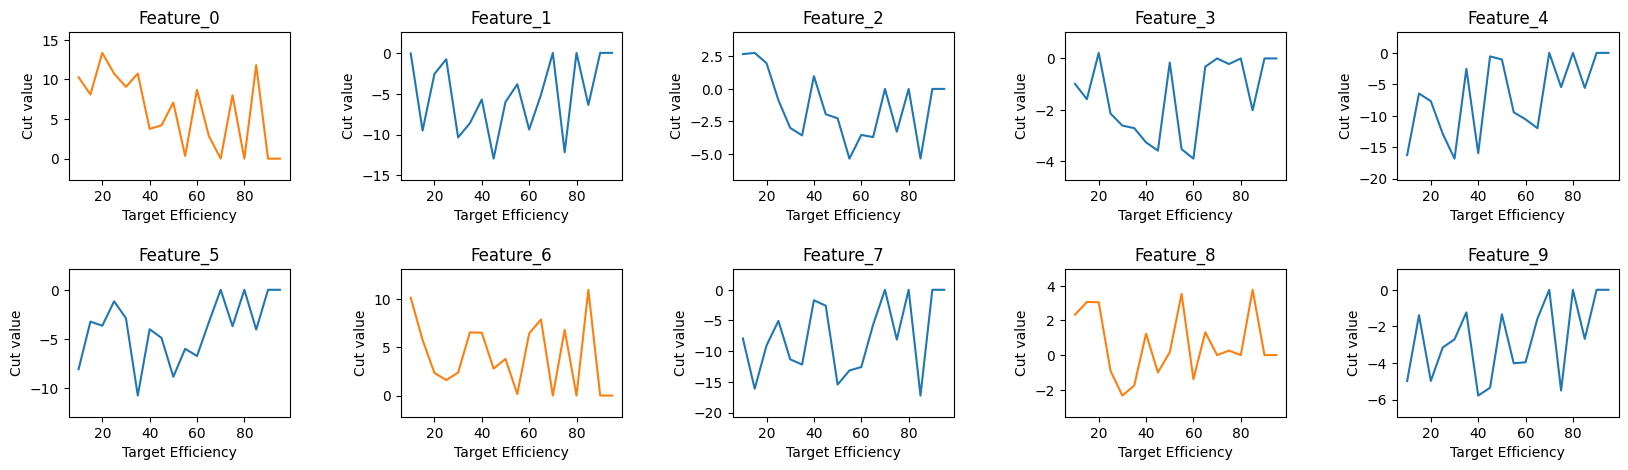

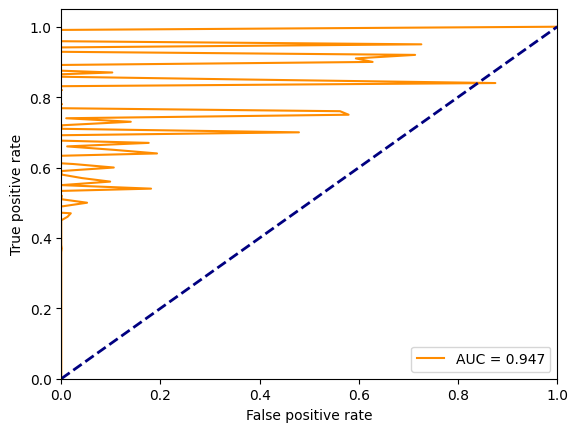

random: GA_Fast


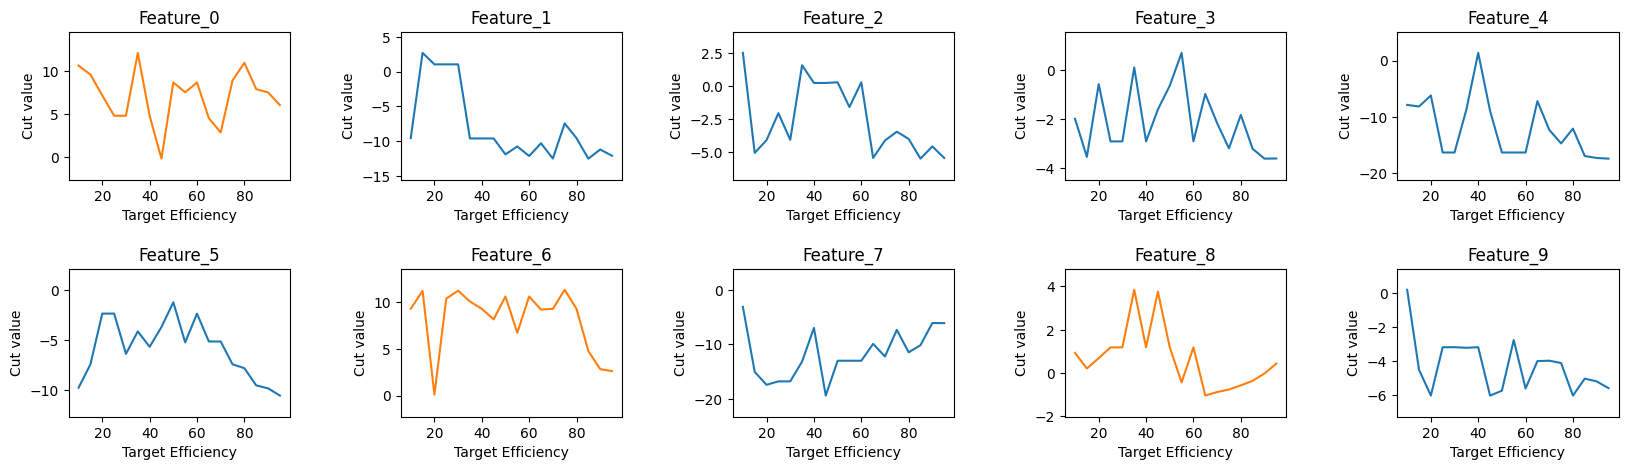

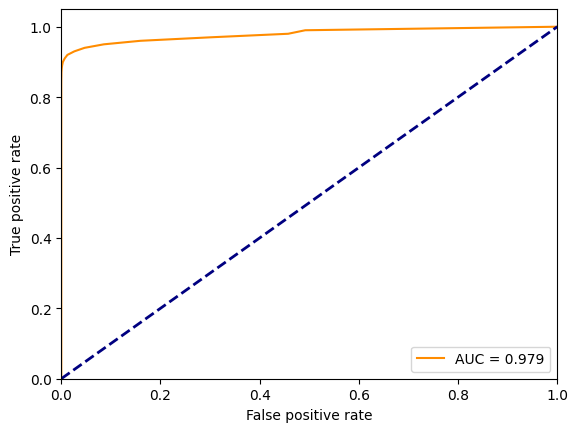

random: GA_Earl


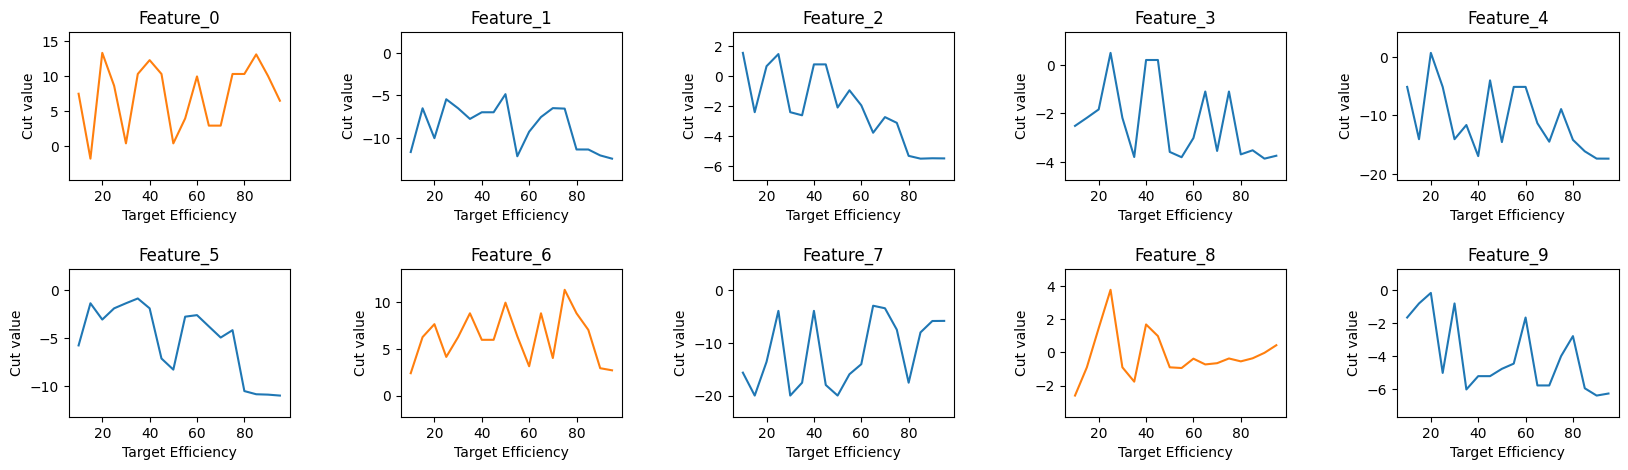

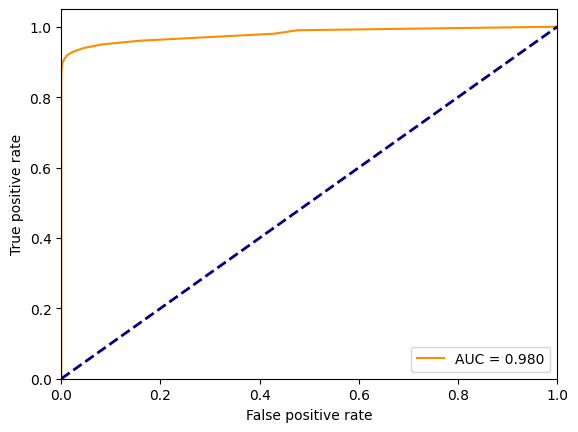

SUSY: MC


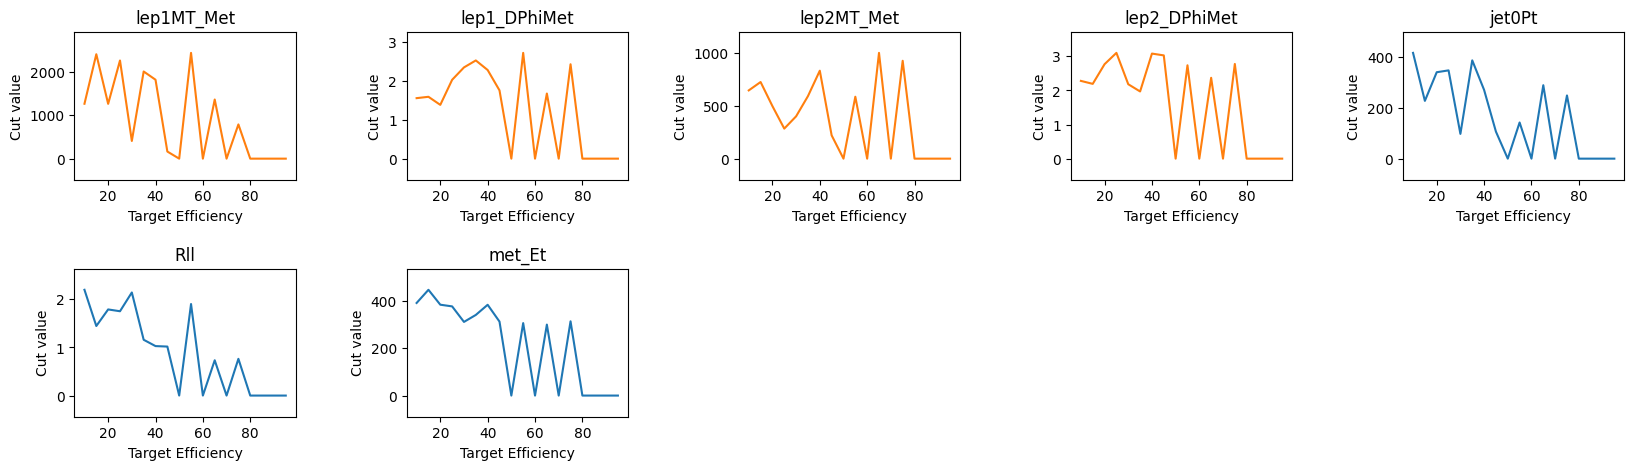

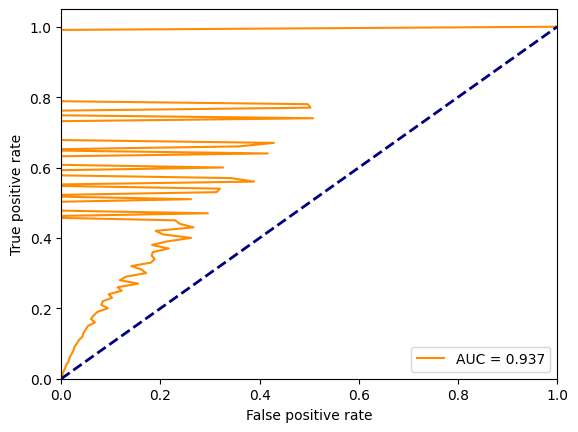

SUSY: GA_Fast


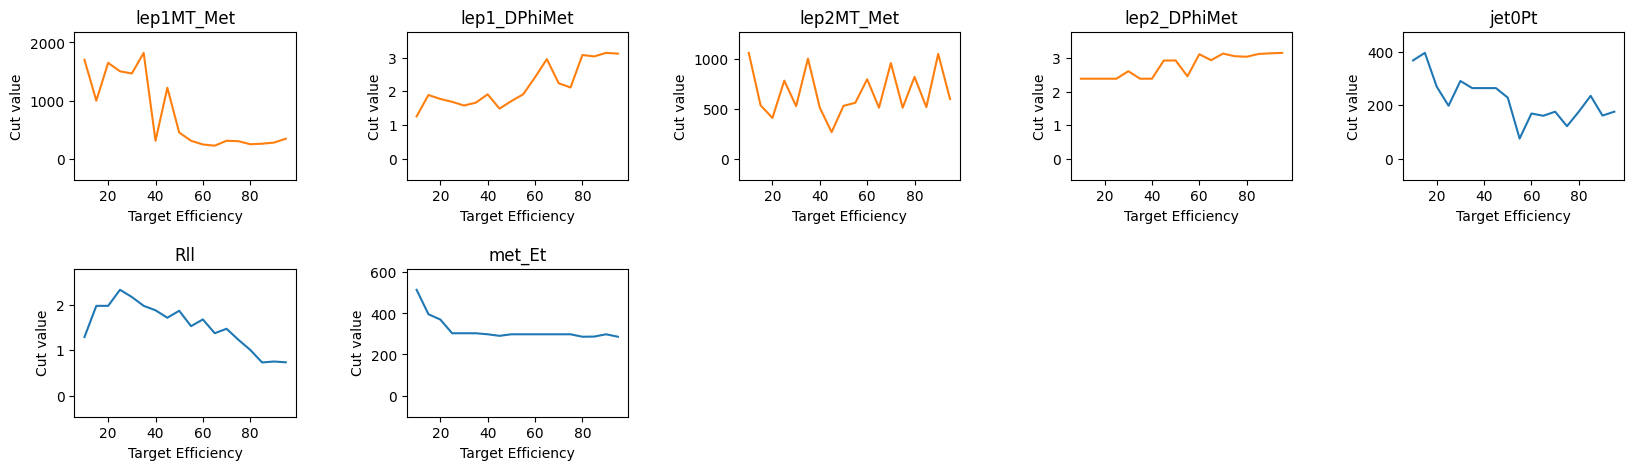

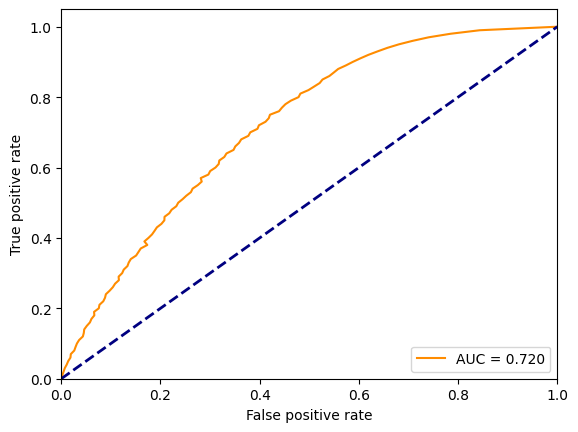

SUSY: GA_Earl


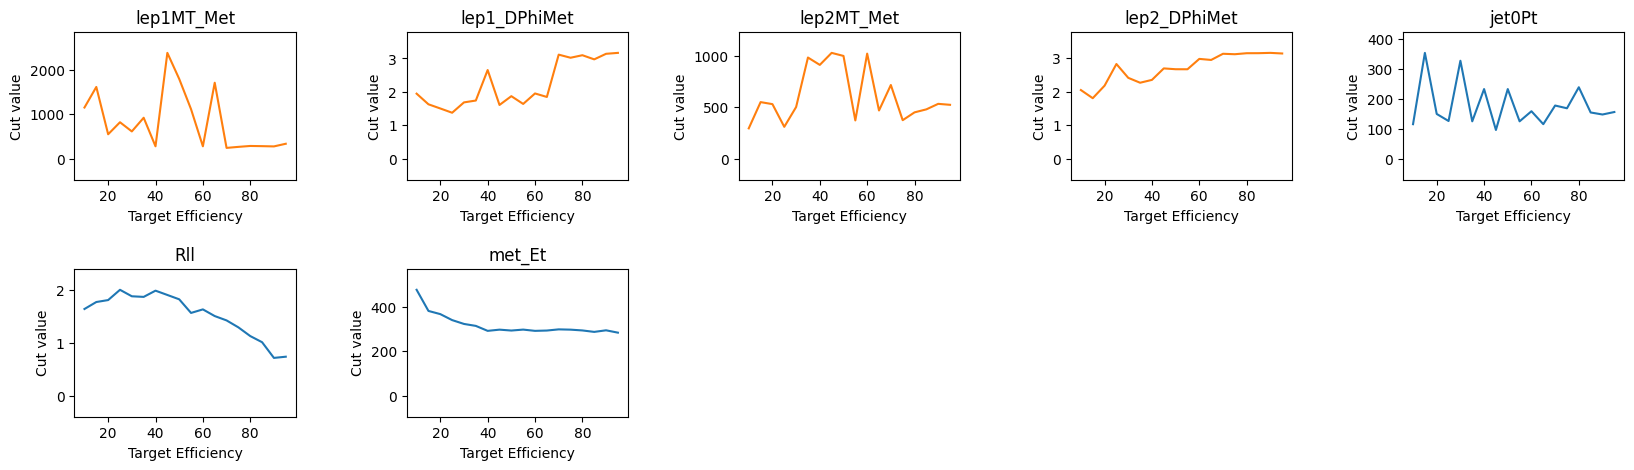

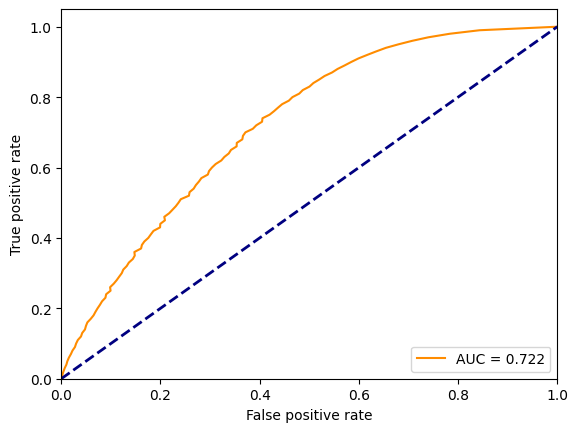

In [21]:
for dataset in ["random","SUSY"]:
    for alg in ["MC","GA_Fast","GA_Earl"]:
        print(f"{dataset}: {alg}")
        plotgenericcuts(readcuts(f"tmva/{dataset}/weights/TMVACuts_Cuts_{alg}.weights.xml"))
        readeffics(f"tmva/{dataset}/weights/TMVACuts_Cuts_{alg}.weights.xml")